In [125]:
import numpy as np
import math
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

# Newton Method

## Input: 
1. Objective function
2. Starting point
3. Number of iteration
4. Optimality gap

## Before we start: check if the Hessian matrix is Invertible 


## Compute:

1. Gradient function
2. Hessian matrix
3. Stopping condition

## Visualisation:

Find the local minimum for the function $f(x) = 2x_1^2+x_2^3$

In [126]:
# Objective function: f(x)
#define variables and formula
x,y = symbols('x,y')
f =  x**3+2*y**2-exp(cos(y))

#Value of function
f_val = lambdify([x,y],f)

# Compute the gradient: f'(x) = 2x
f_grad = [lambdify([x,y],diff(f, x)),lambdify([x,y],diff(f, y))]


#Compute the Hessian
def Hessian(x1,x2):
    H_xx = lambdify([x,y],diff(f, x,x) )
    H_xy = lambdify([x,y],diff(f, x,y) )
    H_yy = lambdify([x,y],diff(f, y,y) )
    
    return np.array([[H_xx(x1,x2),H_xy(x1,x2)],[H_xy(x1,x2),H_yy(x1,x2)]])

#calculate the Euclidean norm between two vectors
def Euclidean_distance(x1,x2):
    #x1, x2 are vectors
    w = x1 - x2   
    return math.sqrt(np.sum(w*w))

#Check if the matrix is invertiable
def is_invertible(a):   
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

# Newton Method
1. max_iterations: Maximum number of iterations to run
2. threshold: Stop if the difference in function values between two successive iterations falls below this threshold
3. w_init: Initial point from where to start gradient descent

In [127]:
def Newton_Method(max_iterations,threshold,w_init):
    
    w = w_init
    # store the history of w and f
    w_history = w
    f_history = f_val(w[0],w[1])
    #update direction
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10   #+infinity
    
    #stopping condition: (1) the number of iteration is larger than max_iterations, or
    #(2) the optimality gap is smaller than threshold
    
    while  i < max_iterations and diff>threshold:
        Hess = Hessian(w[0],w[1])
        if is_invertible(Hess) == False:
            print('Error: Singlar matrix')
            i = max_iterations
        else:
            #update next iteration
            delta_w = np.dot(np.linalg.inv(Hess),[f_grad[0](w[0],w[1]),f_grad[1](w[0],w[1])])
            w = w - delta_w
            # store the history of w and f
            w_history = np.vstack((w_history,w))
            f_history = np.vstack((f_history,f_val(w[0],w[1])))
        
            # update iteration number and diff between successive values of objective function
            i+=1
            diff = Euclidean_distance(f_history[-1],f_history[-2])
        
    
    return w_history,f_history

# Visualisation

In [128]:
rand = np.random.RandomState(10)
w_init = rand.uniform(-1,1,2)
#fig, ax = plt.plot(figsize=(25, 5))
w_History,f_History = Newton_Method(20,0.0005,w_init)

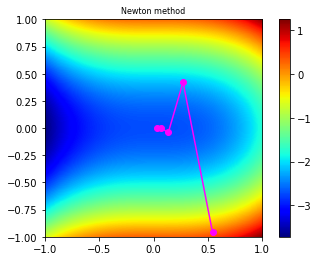

In [129]:
from pylab import figure, cm

x1_min = -1.0
x1_max = 1.0
x2_min = -1.0
x2_max = 1.0

x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

y = f_val(x1,x2)

plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')

plt.colorbar()

plt.title("Newton method" , fontsize=8)

plt.plot(w_History[:,0],w_History[:,1],marker='o',c='magenta') 

plt.show()